In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.decomposition import PCA
import zipfile,os,shutil

In [ ]:
local_zip = 'brain_tumor.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/')
zip_ref.close()

In [ ]:
path = os.listdir('../brain_tumor/Training/')
classes = {'no_tumor':0, 'pituitary_tumor':1}

In [ ]:
X = []
Y = []

for cls in classes:
  pth = '../brain_tumor/Training/'+cls
  for j in os.listdir(pth):
    img = cv2.imread(pth+'/'+j, 0)
    img = cv2.resize(img, (200, 200))
    X.append(img)
    Y.append(classes[cls])

In [ ]:
X = np.array(X)
Y = np.array(Y)

X_updated = X.reshape(len(X), -1)
X_updated

array([[14, 17, 19, ..., 16, 16, 16],
       [ 0,  0,  0, ...,  3,  3,  4],
       [ 0,  1,  4, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8)

In [ ]:
np.unique(Y)

array([0, 1])

In [ ]:
pd.Series(Y).value_counts()

1    827
0    395
dtype: int64

In [ ]:
np.unique(X)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [ ]:
X.shape, X_updated.shape

((1222, 200, 200), (1222, 40000))

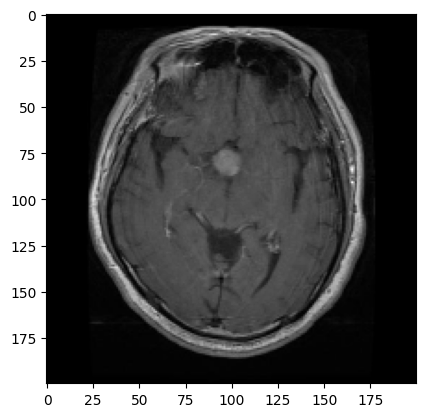

In [ ]:
plt.imshow(X[1031], cmap='gray')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_updated, Y, random_state=20, test_size=30)
X_train.shape, X_test.shape

((1192, 40000), (30, 40000))

In [ ]:
print(X_train.max(), X_train.min())
print(X_test.max(), X_test.min())
X_train = X_train/255
X_test = X_test/255
print(X_train.max(), X_train.min())
print(X_test.max(), X_test.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [ ]:
sv = SVC()
sv.fit(X_train, y_train)

SVC()

In [ ]:
print('Training Score : ', sv.score(X_train, y_train))
print('Testing Score  : ', sv.score(X_test, y_test))

Training Score :  0.9941275167785235
Testing Score  :  0.9666666666666667


In [ ]:
pred = sv.predict(X_test)

In [ ]:
misclassified = np.where(y_test != pred)
misclassified

(array([25]),)

In [ ]:
dec = {0: 'No Tumor', 1: 'Positive Tumor'}

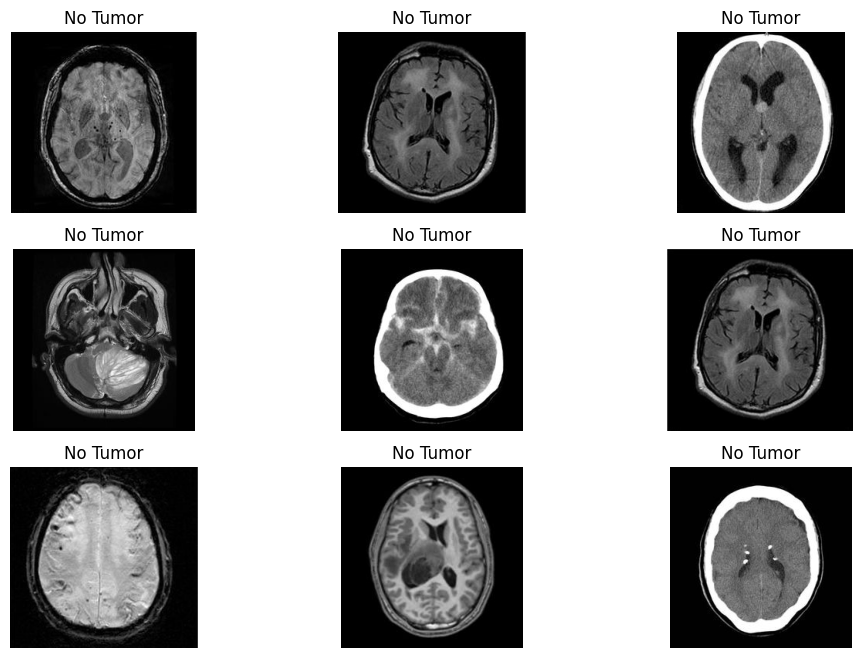

In [ ]:
plt.figure(figsize=(12, 8))
p = os.listdir('../brain_tumor/Testing/')
c = 1

for i in os.listdir('../brain_tumor/Testing/no_tumor/')[:9]:
  plt.subplot(3, 3, c)

  img = cv2.imread('../brain_tumor/Testing/no_tumor/'+i, 0)
  img1 = cv2.resize(img, (200, 200))
  img1 = img1.reshape(1, -1)/255
  p = sv.predict(img1)
  plt.title(dec[p[0]])
  plt.imshow(img, cmap='gray')
  plt.axis('off')
  c+=1

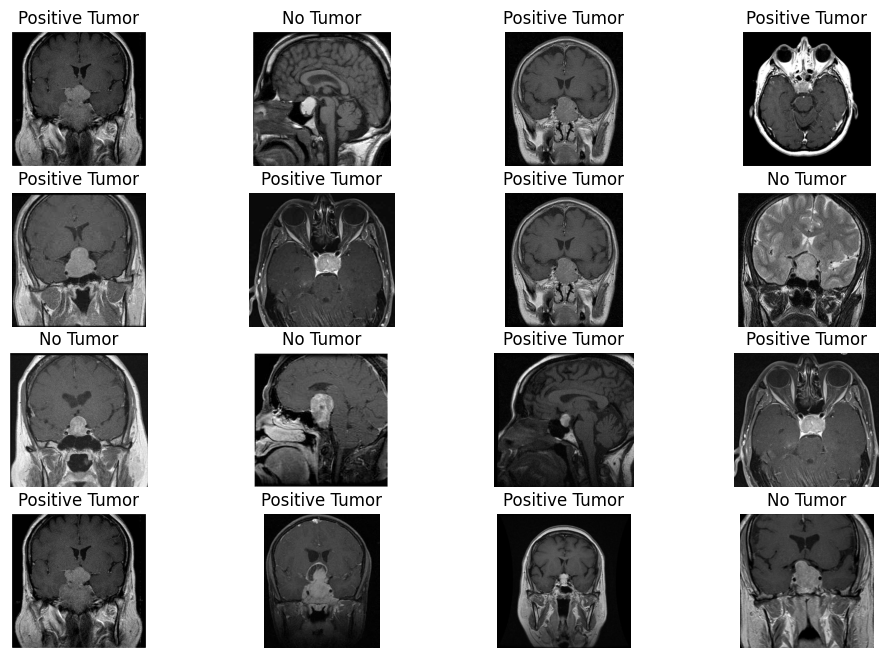

In [ ]:
plt.figure(figsize=(12, 8))
p = os.listdir('../brain_tumor/Testing/')
c = 1

for i in os.listdir('../brain_tumor/Testing/pituitary_tumor/')[:16]:
  plt.subplot(4, 4, c)

  img = cv2.imread('../brain_tumor/Testing/pituitary_tumor/'+i, 0)
  img1 = cv2.resize(img, (200, 200))
  img1 = img1.reshape(1, -1)/255
  p = sv.predict(img1)
  plt.title(dec[p[0]])
  plt.imshow(img, cmap='gray')
  plt.axis('off')
  c+=1